In [143]:
import pandas as pd
import numpy  as np

In [144]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(uri)

df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [145]:
a_rename = {
    'expected_hours':'horas',
    'price':'preco',
    'unfinished':'nao_finalizado'
}
df.rename(columns = a_rename, inplace = True)

In [146]:
trocar = {
    0:1,
    1:0
}
df['finalizado'] = df['nao_finalizado'].map(trocar)

df_new = df.drop(labels = 'nao_finalizado', axis = 1).copy()

In [147]:
df_new

,horas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(palette = 'Accent')
plt.style.use('ggplot')

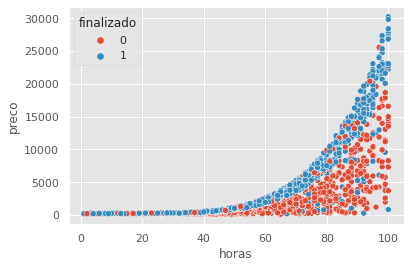

In [149]:
sns.scatterplot(x = 'horas', y = 'preco', data = df_new, hue = 'finalizado')

plt.rcParams['figure.figsize'] = (12, 6)

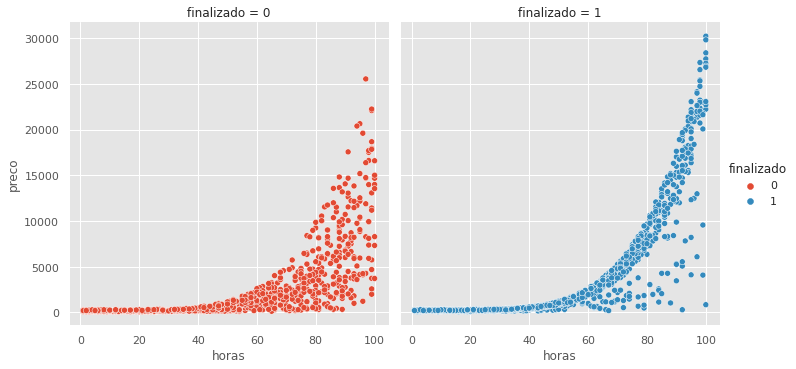

In [150]:
sns.relplot(x = 'horas', y = 'preco', data = df_new, col = 'finalizado',
            hue = 'finalizado')

plt.rcParams['figure.figsize'] = (12, 6)

In [151]:
X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

In [152]:
X

,horas,preco
0,26,192
1,88,9015
2,89,2577
3,42,275
4,39,170
...,...,...
2152,80,7518
2153,52,1332
2154,40,473
2155,75,5324


In [153]:
from sklearn.model_selection import train_test_split

In [154]:
tr_x, val_x, tr_y, val_y = train_test_split(X, y, test_size = 0.25,
                                            stratify = y)

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()

scaled_tr_x  = scaler.fit_transform(tr_x)
scaled_val_x = scaler.fit_transform(val_x)


In [157]:
from sklearn.svm import SVC

np.random.seed(5)

model = SVC()
model.fit(scaled_tr_x, tr_y)

previsoes = model.predict(scaled_val_x)

In [158]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(val_y, previsoes) * 100

print(f'Treinamos com {tr_x.shape[0]} e testamos com {val_y.shape[0]} elementos')
print(f'A acurácia é {acuracia}%')

Treinamos com 1617 e testamos com 540 elementos
A acurácia é 67.5925925925926%


In [159]:
baseline = np.ones(540)

accuracy_baseline = accuracy_score(val_y, baseline)

print(f'A baseline é {accuracy_baseline}%')


A baseline é 0.5259259259259259%


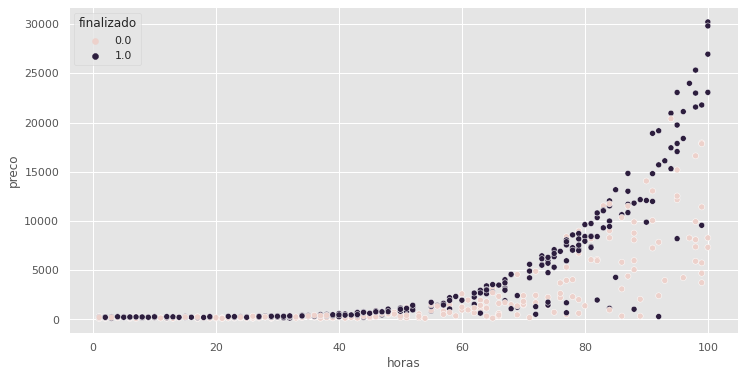

In [160]:
sns.scatterplot(x = 'horas', y = 'preco', data = df_new, hue = val_y)

plt.rcParams['figure.figsize'] = (12, 6)

In [161]:
data_x = scaled_val_x[:, 0]
data_y = scaled_val_x[:, 1]

In [162]:
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

print(x_min, x_max, y_min, y_max)

-1.7080714573071483 1.7064108411500238 -0.6016538693596799 5.125067267159768


In [163]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [164]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

pontos

array([[-1.70807146, -0.60165387],
       [-1.67392663, -0.60165387],
       [-1.63978181, -0.60165387],
       ...,
       [ 1.60397637,  5.06780006],
       [ 1.6381212 ,  5.06780006],
       [ 1.67226602,  5.06780006]])

In [165]:
model.predict(pontos)

array([0, 0, 0, ..., 1, 1, 1])

In [166]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

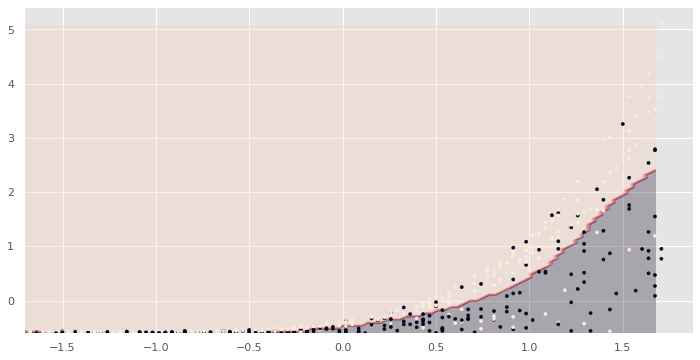

In [171]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = val_y, s =10)